In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp
import sys
import Bio
from Bio import SeqIO, SeqFeature
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

from IPython.display import display
pd.options.display.max_columns = 250
pd.options.display.max_rows = 800

def build_snp_df(gff_dir):
    #parse in snpcalling and restrict to trfA_CDS
    count = 0
    for filename in os.listdir(gff_dir):
        sample_name=(filename.decode('utf-8').rstrip('.sorted.bam.var.txt'))
        sample = os.path.join(gff_dir, filename)
        if os.path.isfile(sample):
            df_sample = pd.read_table(sample.decode('utf-8'))
            df_cds = df_sample.query("pos >3768 & pos < 4918")
            df_cds['Sample'] = sample_name
            
            df_cds.replace(to_replace = 0, value = 1, inplace=True)
            df_cds['norm_mismatch'] = df_cds.mismatches/df_cds.reads_all
            df_cds['norm_match'] = df_cds.matches/df_cds.reads_all
            df_cds['norm_A'] = df_cds['A']/df_cds.reads_all
            df_cds['norm_T'] = df_cds['T']/df_cds.reads_all
            df_cds['norm_C'] = df_cds['C']/df_cds.reads_all
            df_cds['norm_G'] = df_cds['G']/df_cds.reads_all
            
            aa_list = []
            aa_pos = []
            countaa = 1
            
            if count == 0:
                df_snp = df_cds.copy()
                count = 1
                
                for x in Seq(''.join(df_snp.ref)).translate():
                    aa_list.extend([x,x,x])
                    aa_pos.extend([countaa,countaa,countaa])
                    countaa=countaa+1
                
                
            if count == 1:
                df_snp = pd.concat([df_snp,df_cds])
            
    return df_snp
            

In [3]:
gff_dir = os.fsencode("/Users/MThompson/Downloads/r2k_var")
df_snp=build_snp_df(gff_dir)
sample_meta = pd.read_csv('sample_groups_r2k.csv')
group_map = dict(zip(sample_meta['Sample'],sample_meta['Group']))
df_snp['Group'] = df_snp['Sample'].map(group_map)

aa_list = []
aa_pos = []

count = 1
for x in Seq(''.join(df_snp[df_snp.Sample=='750g-5SA-mut2_S5_L001_mapping'].ref)).translate():
    aa_list.extend([x,x,x])
    aa_pos.extend([count,count,count])
    count=count+1

df_aa = pd.DataFrame([aa_list,aa_pos]).transpose()

df_aa['pos'] = df_snp[df_snp.Sample=='750g-5SA-mut2_S5_L001_mapping'].pos.tolist()

aa_map = dict(zip(df_aa['pos'],df_aa[0]))
aapos_map = dict(zip(df_aa['pos'],df_aa[1]))

df_snp['AA'] = df_snp['pos'].map(aa_map)
df_snp['AApos'] = df_snp['pos'].map(aapos_map)
df_snp['AApos'] = df_snp['AApos']-383
df_snp['AAInfo'] = df_snp.AA + df_snp.AApos.astype(str)




df_snp

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['Sample'] = sample_name
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds.replace(to_replace = 0, value = 1, inplace=True)
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['Sample'] = sample_name
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds.replace(to_replace = 0, value = 1, inplace=True)
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['Sample'] = sample_name
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds.replace(to_replace = 0, value = 1, inplace=True)
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/2480414477.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
3768,Gent_RK2,3769,A,64734,57577,64694,57541,40,36,1,1,1,1,64694,57541,7,7,22,19,11,10,1,1,750g-5SA-mut2_S5_L001_mapping,0.000618,0.999382,0.999382,0.000340,0.000108,0.000170,g750s5,M,1,M1
3769,Gent_RK2,3770,T,64631,57494,64612,57480,15,11,4,3,1,1,7,4,7,6,64612,57480,1,1,1,1,750g-5SA-mut2_S5_L001_mapping,0.000232,0.999706,0.000108,0.999706,0.000108,0.000015,g750s5,M,1,M1
3770,Gent_RK2,3771,G,64969,57804,64948,57785,21,19,1,1,2,1,11,9,2,2,8,8,64948,57785,1,1,750g-5SA-mut2_S5_L001_mapping,0.000323,0.999677,0.000169,0.000123,0.000031,0.999677,g750s5,M,1,M1
3771,Gent_RK2,3772,A,65487,58246,65446,58211,20,17,21,18,1,1,65446,58211,5,4,4,4,11,9,1,1,750g-5SA-mut2_S5_L001_mapping,0.000305,0.999374,0.999374,0.000061,0.000076,0.000168,g750s5,N,2,N2
3772,Gent_RK2,3773,A,65482,58268,65403,58194,79,74,1,1,1,1,65403,58194,64,61,10,10,5,3,1,1,750g-5SA-mut2_S5_L001_mapping,0.001206,0.998794,0.998794,0.000153,0.000977,0.000076,g750s5,N,2,N2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Gent_RK2,4913,G,94995,79403,94922,79354,73,49,1,1,12,1,47,41,7,3,19,5,94922,79354,1,1,12SA-WT2_S12_L001_mapping,0.000768,0.999232,0.000495,0.000200,0.000074,0.999232,WT,R,382,R382
4913,Gent_RK2,4914,C,94432,78874,94366,78849,66,25,1,1,18,1,6,5,94366,78849,25,16,35,4,1,1,12SA-WT2_S12_L001_mapping,0.000699,0.999301,0.000064,0.000265,0.999301,0.000371,WT,R,382,R382
4914,Gent_RK2,4915,T,94075,78506,93994,78480,81,26,1,1,19,1,1,1,32,21,93994,78480,48,5,1,1,12SA-WT2_S12_L001_mapping,0.000861,0.999139,0.000011,0.999139,0.000340,0.000510,WT,*,383,*383
4915,Gent_RK2,4916,A,93232,77706,93126,77680,106,26,1,1,10,1,93126,77680,24,1,22,7,60,19,1,1,12SA-WT2_S12_L001_mapping,0.001137,0.998863,0.998863,0.000236,0.000257,0.000644,WT,*,383,*383


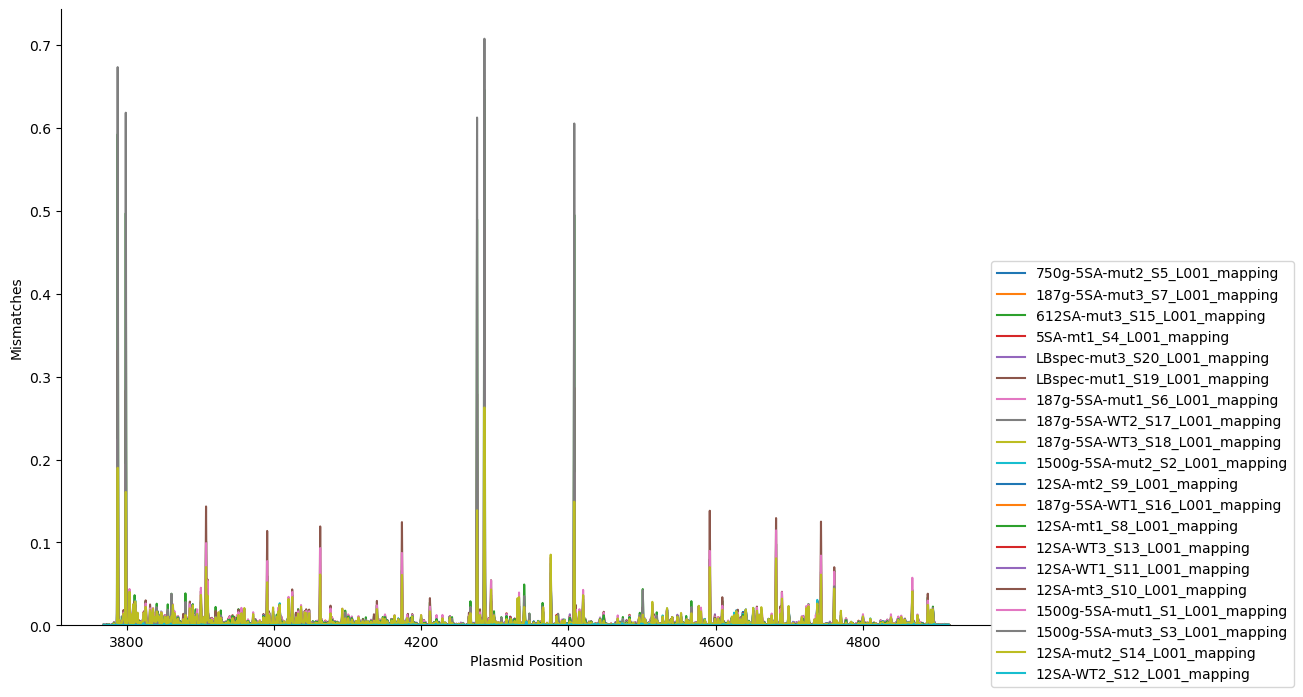

In [4]:
plt.figure(figsize=(12,8))
for cond in df_snp.Sample.unique():
    plt.plot(df_snp[df_snp.Sample==cond].pos,df_snp[df_snp.Sample==cond].norm_mismatch)
    
plt.legend(df_snp.Sample.unique(),loc=(1,-0.1))
plt.ylim(0,)
plt.ylabel('Mismatches')
plt.xlabel('Plasmid Position')
sns.despine()

In [5]:
df_mutant = df_snp[df_snp.Sample.isin(['750g-5SA-mut2_S5_L001_mapping', '187g-5SA-mut3_S7_L001_mapping',
       '612SA-mut3_S15_L001_mapping', '5SA-mt1_S4_L001_mapping',
       '187g-5SA-mut1_S6_L001_mapping','1500g-5SA-mut2_S2_L001_mapping',
       '12SA-mt2_S9_L001_mapping','12SA-mt1_S8_L001_mapping',  '12SA-mt3_S10_L001_mapping',
       '1500g-5SA-mut1_S1_L001_mapping', '1500g-5SA-mut3_S3_L001_mapping',
       '12SA-mut2_S14_L001_mapping', ])]

In [6]:
time_zero = df_snp[df_snp.Sample.isin(['LBspec-mut3_S20_L001_mapping', 
                           'LBspec-mut1_S19_L001_mapping',])].groupby(['pos']).mean()

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/4258898970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_zero = df_snp[df_snp.Sample.isin(['LBspec-mut3_S20_L001_mapping',


In [7]:
time_zero

,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,AApos
pos,,,,,,,,,,,,,,,,,,,,,,,,,,,
3769,40204.5,35060.5,40171.5,35033.5,33.0,27.0,1.0,1.0,1.0,1.0,40171.5,35033.5,5.0,3.0,18.0,16.0,10.5,8.5,1.0,1.0,0.001021,0.998979,0.998979,0.000675,0.000139,0.000286,1.0
3770,40142.5,35010.0,40126.5,34996.5,11.5,10.5,4.5,3.0,1.0,1.0,2.0,2.0,7.0,6.0,40126.5,34996.5,3.0,3.0,1.0,1.0,0.000300,0.999495,0.000099,0.999495,0.000167,0.000113,1.0
3771,40340.5,35194.5,40333.0,35187.0,7.5,7.5,1.0,1.0,1.0,1.0,6.0,6.0,1.5,1.5,1.0,1.0,40333.0,35187.0,1.0,1.0,0.000316,0.999684,0.000296,0.000085,0.000092,0.999684,1.0
3772,40703.0,35500.5,40684.0,35484.0,8.0,6.5,11.0,10.0,1.0,1.0,40684.0,35484.0,2.5,2.5,1.5,1.0,5.0,4.0,1.0,1.0,0.000178,0.999604,0.999604,0.000091,0.000105,0.000138,2.0
3773,40710.0,35529.5,40647.5,35475.0,62.0,54.0,1.0,1.0,1.0,1.0,40647.5,35475.0,52.5,46.0,2.5,2.5,7.5,6.0,1.0,1.0,0.001538,0.998384,0.998384,0.000105,0.001198,0.000314,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,52340.0,44276.5,52311.5,44254.0,28.5,22.5,1.0,1.0,6.5,1.5,20.5,18.0,1.0,1.0,7.5,4.5,52311.5,44254.0,1.0,1.0,0.000742,0.999258,0.000403,0.000334,0.000075,0.999258,382.0
4914,52025.5,43984.5,51999.0,43976.5,26.0,7.5,1.0,1.0,7.5,1.0,5.5,3.5,51999.0,43976.5,9.5,4.5,12.0,1.0,1.0,1.0,0.000333,0.999662,0.000122,0.000163,0.999662,0.000189,382.0
4915,51767.0,43749.0,51733.0,43738.0,33.5,10.5,1.0,1.0,10.0,1.0,3.0,2.5,12.5,7.5,51733.0,43738.0,19.0,1.5,1.0,1.0,0.000478,0.999517,0.000096,0.999517,0.000260,0.000262,383.0


In [8]:
d_match = []
d_mismatch = []
d_a = []
d_t = []
d_c = []
d_g = []

for row in df_mutant.iterrows():
    temp_zero = time_zero[time_zero.index==row[1].pos]
    d_mismatch.append(row[1].norm_mismatch/temp_zero.norm_mismatch.values[0])
    d_match.append(row[1].norm_match/temp_zero.norm_match.values[0])
    d_a.append(row[1].norm_A/temp_zero.norm_A.values[0])
    d_t.append(row[1].norm_T/temp_zero.norm_T.values[0])
    d_c.append(row[1].norm_C /temp_zero.norm_C.values[0])
    d_g.append(row[1].norm_G/temp_zero.norm_G.values[0])





In [9]:
df_mutant['change_mismatch'] = d_mismatch
df_mutant['change_match'] = d_match
df_mutant['change_a'] = d_a
df_mutant['change_t'] = d_t
df_mutant['change_c'] = d_c
df_mutant['change_g'] = d_g


df_mutant

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/3016496591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_mismatch'] = d_mismatch
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/3016496591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_match'] = d_match
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/3016496591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo,change_mismatch,change_match,change_a,change_t,change_c,change_g
3768,Gent_RK2,3769,A,64734,57577,64694,57541,40,36,1,1,1,1,64694,57541,7,7,22,19,11,10,1,1,750g-5SA-mut2_S5_L001_mapping,0.000618,0.999382,0.999382,0.000340,0.000108,0.000170,g750s5,M,1,M1,0.605018,1.000404,1.000404,0.503605,0.775275,0.594750
3769,Gent_RK2,3770,T,64631,57494,64612,57480,15,11,4,3,1,1,7,4,7,6,64612,57480,1,1,1,1,750g-5SA-mut2_S5_L001_mapping,0.000232,0.999706,0.000108,0.999706,0.000108,0.000015,g750s5,M,1,M1,0.774626,1.000211,1.093030,1.000211,0.649669,0.137394
3770,Gent_RK2,3771,G,64969,57804,64948,57785,21,19,1,1,2,1,11,9,2,2,8,8,64948,57785,1,1,750g-5SA-mut2_S5_L001_mapping,0.000323,0.999677,0.000169,0.000123,0.000031,0.999677,g750s5,M,1,M1,1.022518,0.999993,0.572140,1.445513,0.334923,0.999993
3771,Gent_RK2,3772,A,65487,58246,65446,58211,20,17,21,18,1,1,65446,58211,5,4,4,4,11,9,1,1,750g-5SA-mut2_S5_L001_mapping,0.000305,0.999374,0.999374,0.000061,0.000076,0.000168,g750s5,N,2,N2,1.715463,0.999770,0.999770,0.668565,0.729272,1.216934
3772,Gent_RK2,3773,A,65482,58268,65403,58194,79,74,1,1,1,1,65403,58194,64,61,10,10,5,3,1,1,750g-5SA-mut2_S5_L001_mapping,0.001206,0.998794,0.998794,0.000153,0.000977,0.000076,g750s5,N,2,N2,0.784174,1.000411,1.000411,1.461194,0.815645,0.243532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Gent_RK2,4913,G,84154,66634,84100,66592,54,42,1,1,9,1,43,33,5,4,6,5,84100,66592,1,1,12SA-mut2_S14_L001_mapping,0.000642,0.999358,0.000511,0.000071,0.000059,0.999358,g375s0.6,R,382,R382,0.864508,1.000101,1.267563,0.213460,0.797239,1.000101
4913,Gent_RK2,4914,C,83676,66221,83623,66199,53,22,1,1,21,1,7,4,83623,66199,26,16,20,2,1,1,12SA-mut2_S14_L001_mapping,0.000633,0.999367,0.000084,0.000311,0.999367,0.000239,g375s0.6,R,382,R382,1.901400,0.999705,0.688100,1.907998,0.999705,1.266983
4914,Gent_RK2,4915,T,83413,65945,83348,65922,64,22,1,1,28,1,4,2,22,16,83348,65922,38,4,1,1,12SA-mut2_S14_L001_mapping,0.000767,0.999221,0.000048,0.999221,0.000264,0.000456,g375s0.6,*,383,*383,1.606496,0.999703,0.498520,0.999703,1.015193,1.737886
4915,Gent_RK2,4916,A,82758,65373,82666,65351,89,19,3,3,27,13,82666,65351,16,4,11,6,62,9,1,1,12SA-mut2_S14_L001_mapping,0.001075,0.998888,0.998888,0.000133,0.000193,0.000749,g375s0.6,*,383,*383,1.696073,0.999522,0.999522,0.734789,1.249649,1.701397


In [10]:
df_mutant.to_csv('Matthew_Rawish_R2K_data.csv')

In [11]:
mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()
mutant_means

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_85594/1969063143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()


reads_all      reads_pp       matches  \
Group   pos  ref AApos AA AAInfo                                             
g1500s5 3769 A   1     M  M1      23594.333333  18583.666667  23577.333333   
        3770 T   1     M  M1      23557.000000  18564.000000  23548.333333   
        3771 G   1     M  M1      23684.000000  18669.000000  23674.000000   
        3772 A   2     N  N2      23888.666667  18821.333333  23854.000000   
        3773 A   2     N  N2      23869.000000  18820.666667  23857.000000   
...                                        ...           ...           ...   
g750s5  4913 G   382   R  R382    81113.333333  69607.333333  81064.333333   
        4914 C   382   R  R382    80580.666667  69113.000000  80539.000000   
        4915 T   383   *  *383    80248.666667  68785.333333  80200.333333   
        4916 A   383   *  *383    79524.666667  68107.666667  79460.333333   
        4917 G   383   *  *383    79500.000000  68073.333333  79454.000000   

                                    matches_pp  mismatches  mismatches_pp  \
Group   pos  ref AApos AA AAInfo                                            
g1500s5 3769 A   1     M  M1      18570.000000   17.000000      13.666667   
        3770 T   1     M  M1      18556.666667    8.000000       6.666667   
        3771 G   1     M  M1      18660.000000   10.000000       9.000000   
        3772 A   2     N  N2      18794.333333    7.666667       5.666667   
        3773 A   2     N  N2      18811.666667   12.000000       9.000000   
...                                        ...         ...            ...   
g750s5  4913 G   382   R  R382    69568.666667   49.000000      38.666667   
        4914 C   382   R  R382    69096.666667   41.666667      16.333333   
        4915 T   383   *  *383    68761.333333   46.666667      22.333333   
        4916 A   383   *  *383    68084.000000   63.333333      22.666667   
        4917 G   383   *  *383    68036.333333   33.000000      26.666667   

                                  deletions  deletions_pp  insertions  \
Group   pos  ref AApos AA AAInfo                                        
g1500s5 3769 A   1     M  M1       1.000000      1.000000    1.000000   
        3770 T   1     M  M1       1.333333      1.333333    1.000000   
        3771 G   1     M  M1       1.000000      1.000000    1.000000   
        3772 A   2     N  N2      27.000000     21.333333    1.000000   
        3773 A   2     N  N2       1.000000      1.000000    1.000000   
...                                     ...           ...         ...   
g750s5  4913 G   382   R  R382     1.000000      1.000000    3.666667   
        4914 C   382   R  R382     1.000000      1.000000    7.333333   
        4915 T   383   *  *383     1.666667      1.666667   14.000000   
        4916 A   383   *  *383     1.000000      1.000000   40.333333   
        4917 G   383   *  *383    13.000000     10.333333    4.666667   

                                  insertions_pp             A          A_pp  \
Group   pos  ref AApos AA AAInfo                                              
g1500s5 3769 A   1     M  M1           1.000000  23577.333333  18570.000000   
        3770 T   1     M  M1           1.000000      2.333333      2.333333   
        3771 G   1     M  M1           1.000000      3.666667      3.333333   
        3772 A   2     N  N2           1.000000  23854.000000  18794.333333   
        3773 A   2     N  N2           1.000000  23857.000000  18811.666667   
...                                         ...           ...           ...   
g750s5  4913 G   382   R  R382         1.000000     35.333333     29.666667   
        4914 C   382   R  R382         1.000000     10.333333      7.333333   
        4915 T   383   *  *383         1.000000      5.000000      4.333333   
        4916 A   383   *  *383        26.666667  79460.333333  68084.000000   
        4917 G   383   *  *383         1.000000     17.333333     14.666667   

                                          

In [12]:
mutant_means = mutant_means.reset_index()

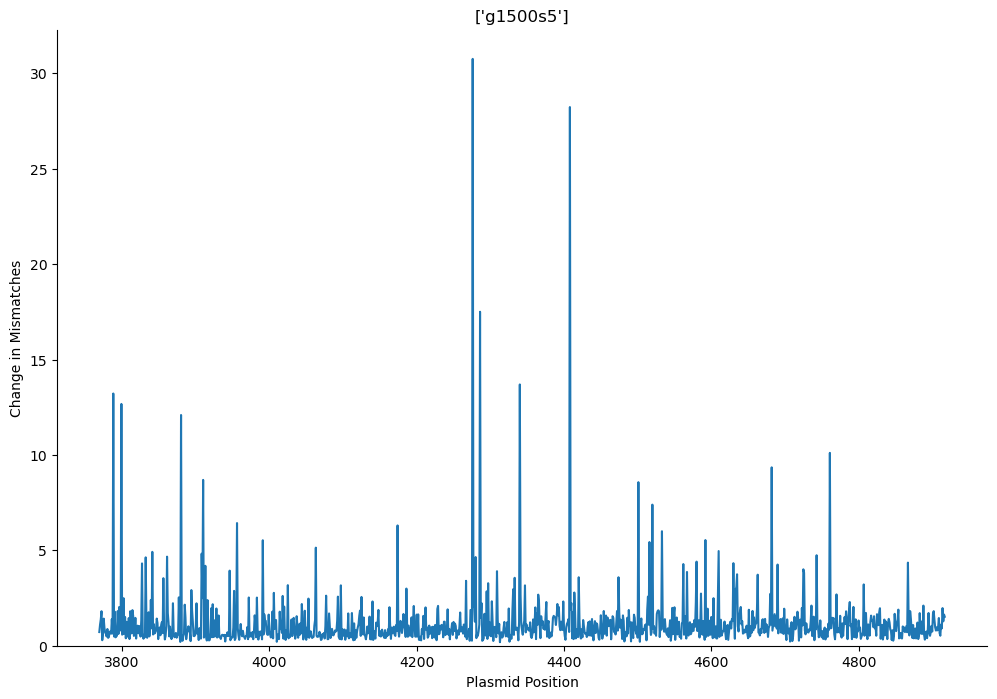

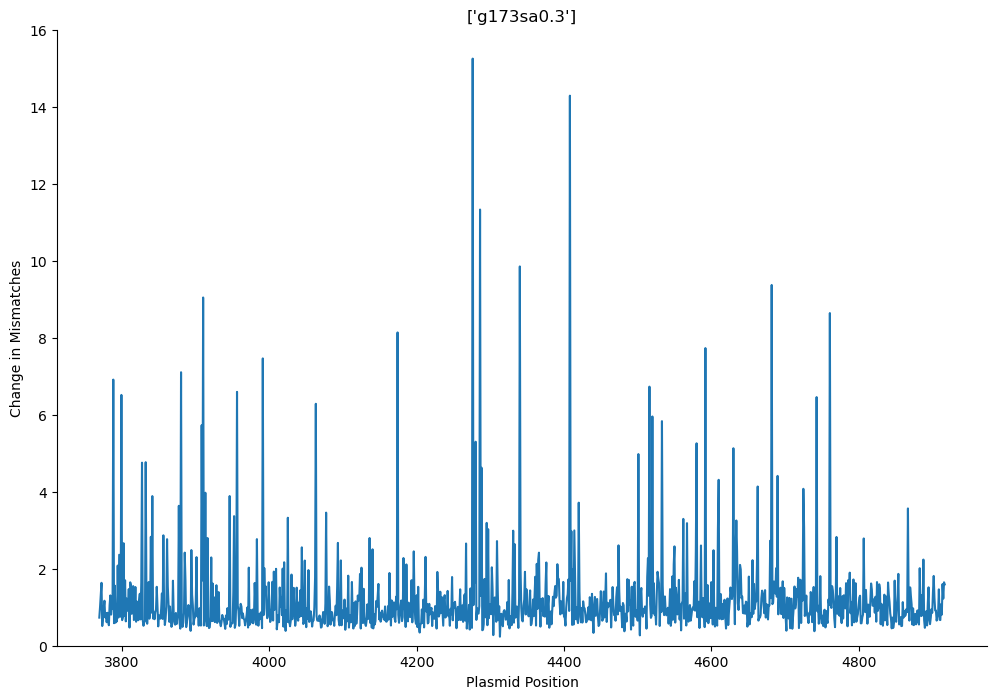

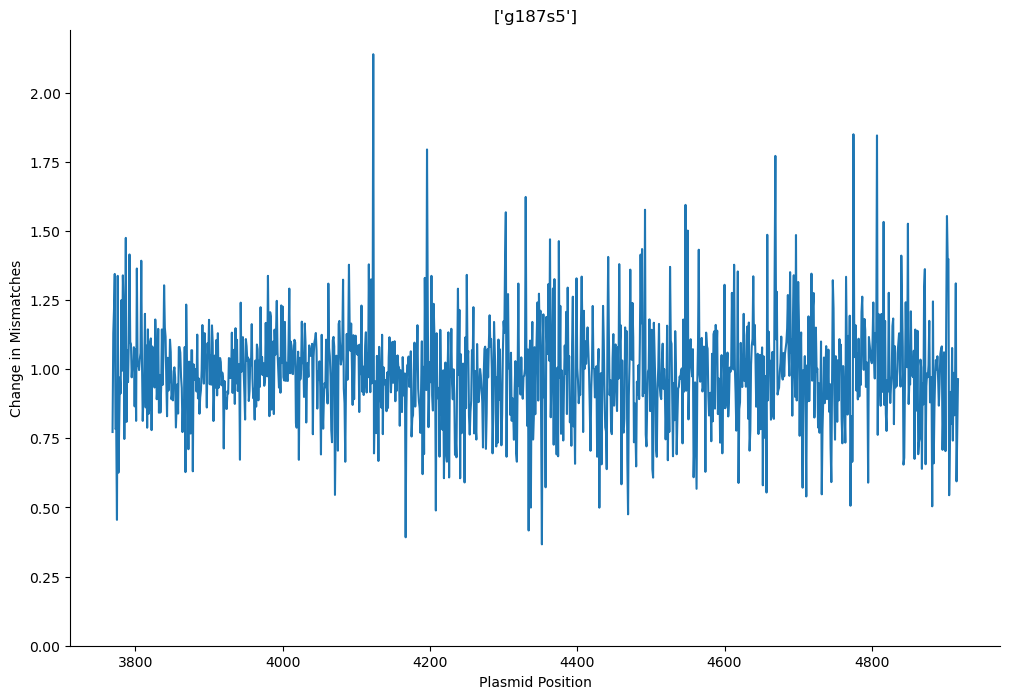

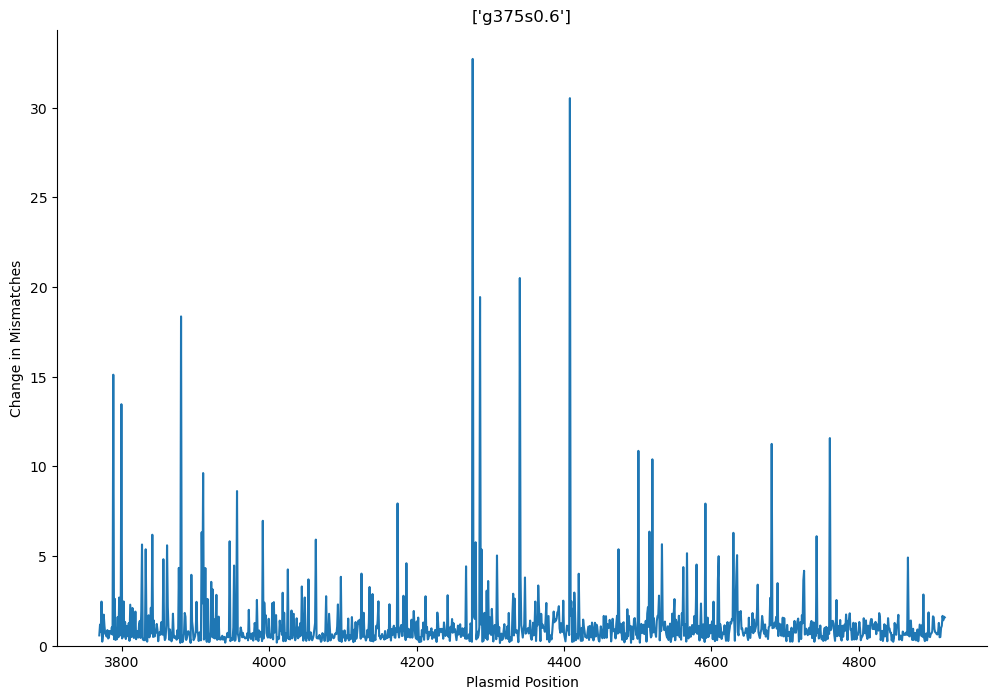

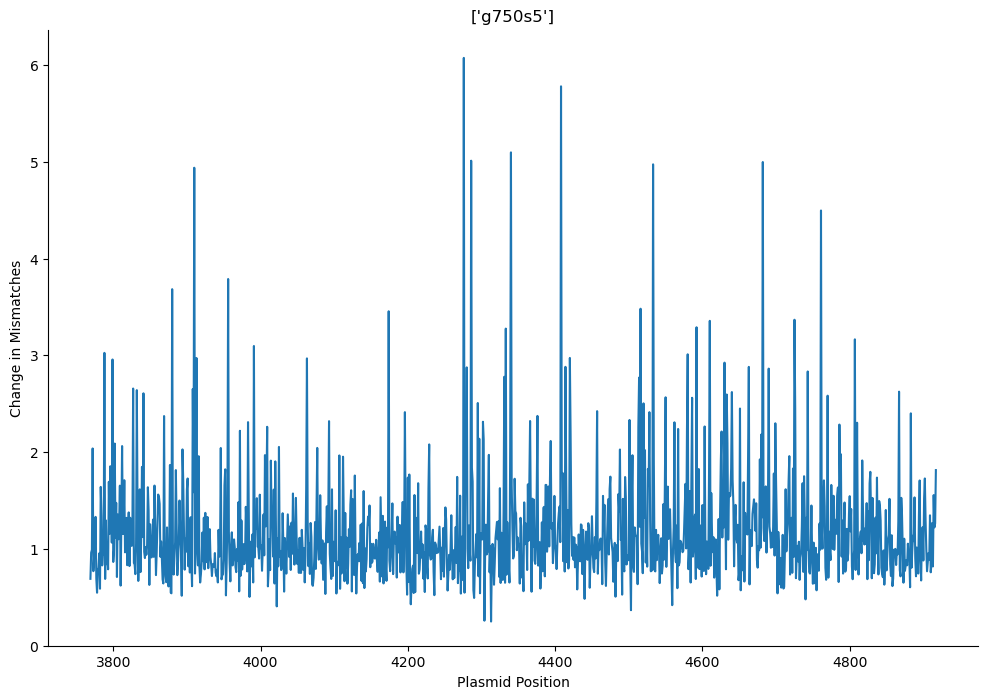

In [13]:
for cond in mutant_means.Group.unique():
    plt.figure(figsize=(12,8))
    plt.plot(mutant_means[mutant_means.Group==cond].pos,mutant_means[mutant_means.Group==cond].change_mismatch)
    plt.ylim(0,)
    plt.title(mutant_means[mutant_means.Group==cond].Group.unique())
    plt.ylabel('Change in Mismatches')
    plt.xlabel('Plasmid Position')
    sns.despine()

In [14]:
for x in [2,3,4,5,6,7,8,9,10]:
    print(x,len(mutant_means[mutant_means.change_mismatch>x].pos.unique()))



2 150
3 67
4 50
5 34
6 22
7 16
8 14
9 12
10 11


In [15]:
selected_snps = mutant_means[mutant_means.change_mismatch>5].pos.unique()

In [16]:
mutant_means[mutant_means.pos.isin(selected_snps)].sort_values(by='pos').to_csv('mathew_selected_r2kmuts.csv')

Text(0.5, 28.999999999999986, 'Amino Acid')

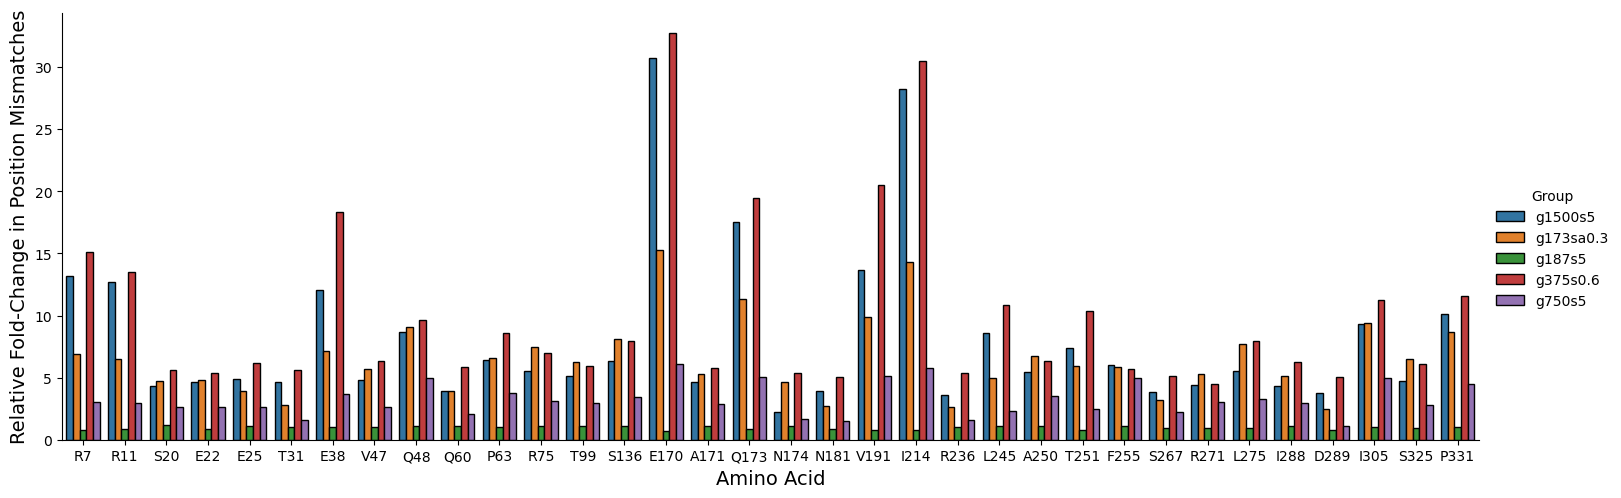

In [18]:
sns.catplot(data=mutant_means[mutant_means.pos.isin(selected_snps)],
            x='AAInfo',y='change_mismatch',hue='Group',kind='bar',aspect=3,edgecolor='black')
plt.ylabel('Relative Fold-Change in Position Mismatches',size=14)
plt.xlabel('Amino Acid',size=14)